In [40]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [41]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

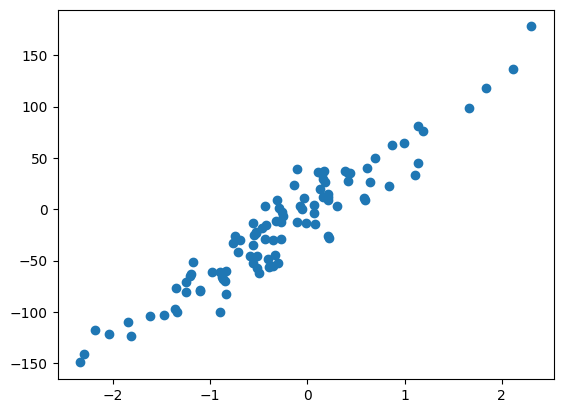

In [42]:
plt.scatter(X, y)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [77]:
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[63.11293391]
-1.743073703479471


In [78]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8764618595849097

In [79]:
# R2 cross_val_score of the current data
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

np.float64(0.8562798108685239)

# Creating Own Class for Gradient Descent

In [80]:
class GDReg:

    def __init__(self, learning_rate, epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # calculate the b using gradient descent
        # epoch is the no. of rotations to reach the minima
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            #print(self.m, self.b)
        print(self.m, self.b)
    def predict(self, X):
        return self.m * X + self.b

In [81]:
gd = GDReg(0.001, 50)

In [82]:
gd.fit(X_train, y_train)

62.92791357201996 -1.8913413877789267


In [83]:
# gd.predict(X)

In [85]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8763214001774107